folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 0


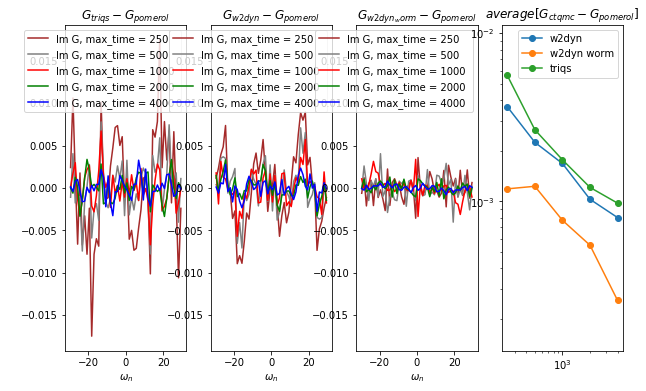

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 1


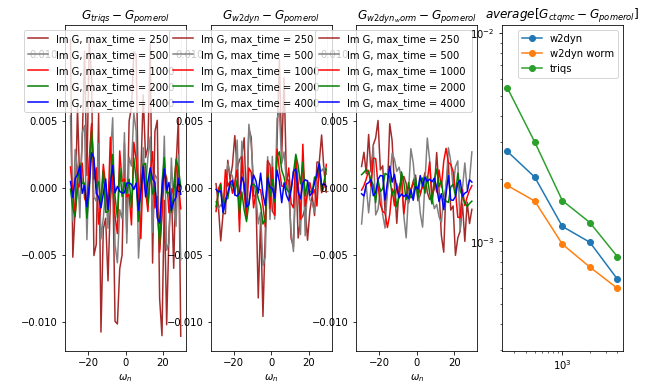

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 0


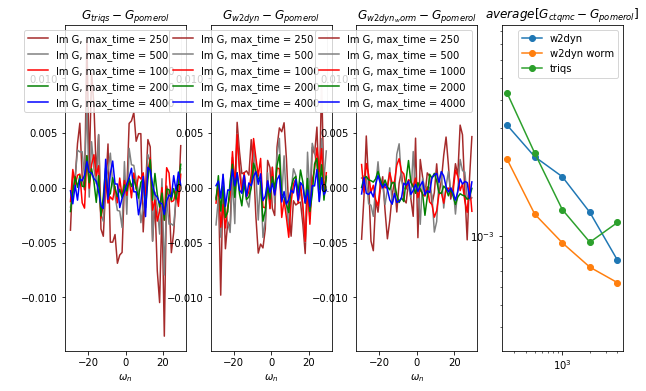

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 1


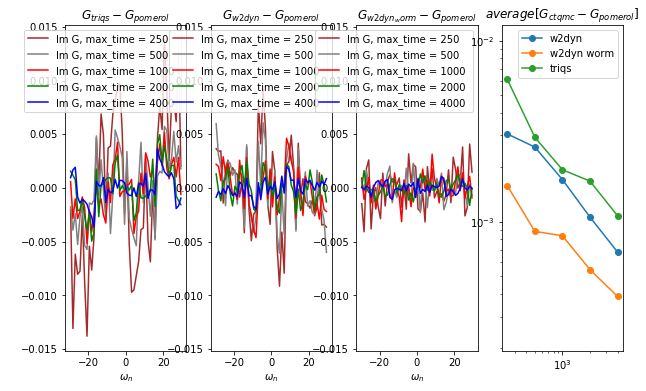

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 0


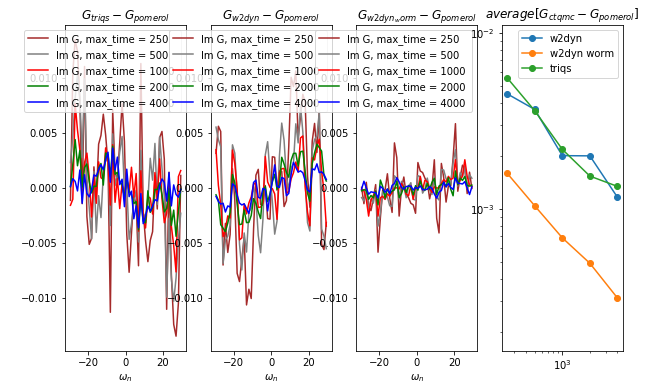

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 1


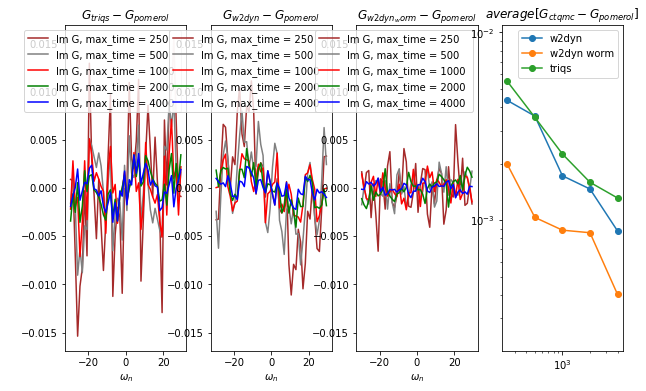

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 0


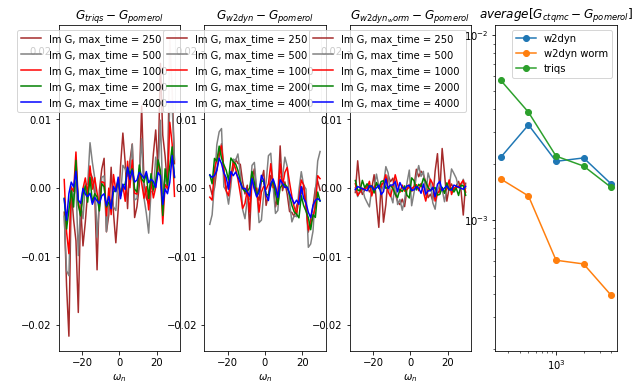

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 1


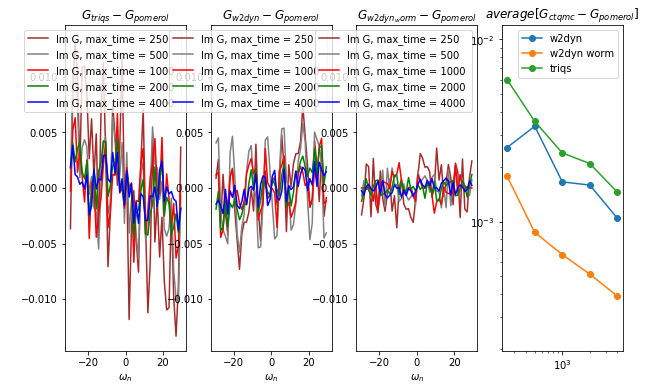

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 0


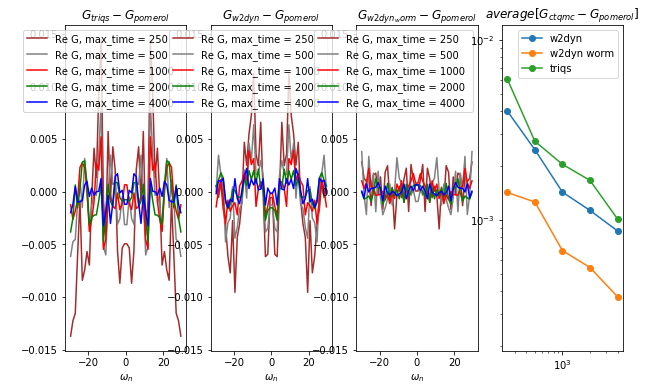

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 1


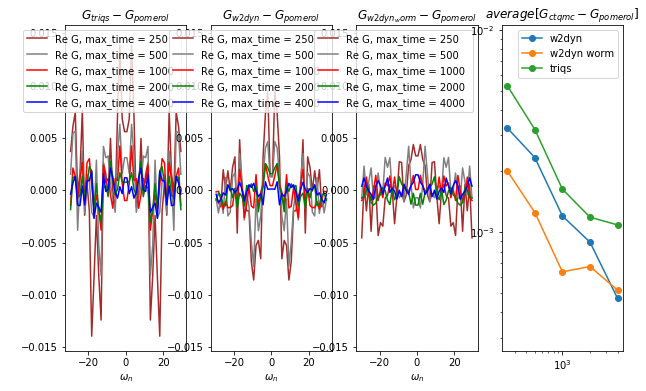

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 0


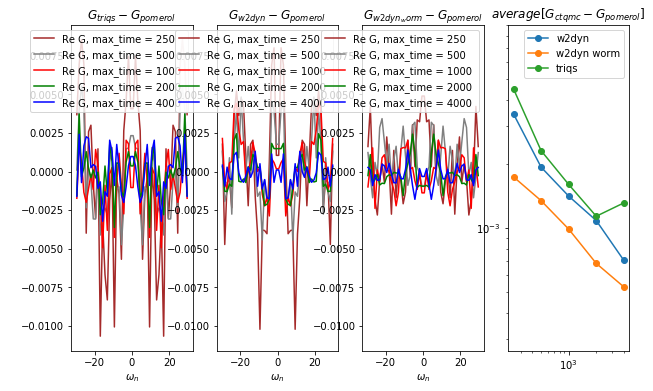

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 1


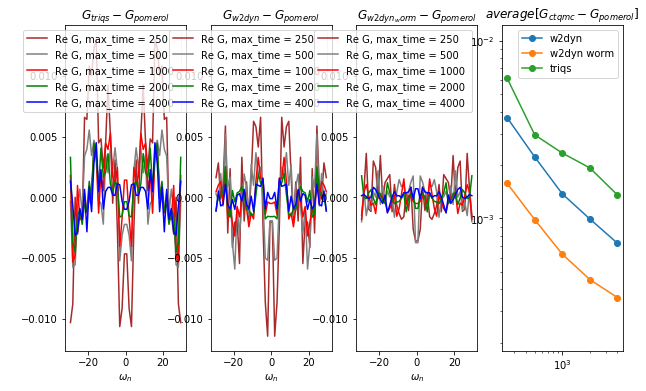

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 0


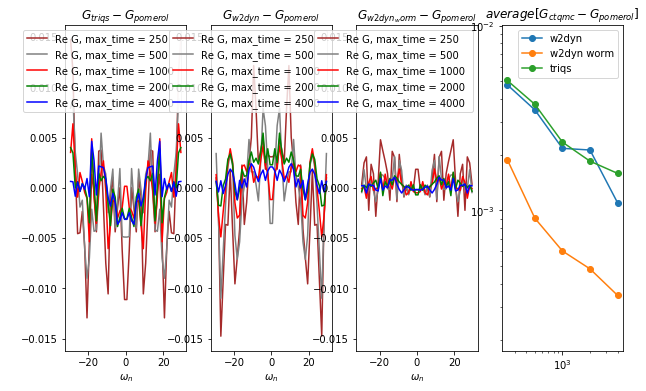

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 1


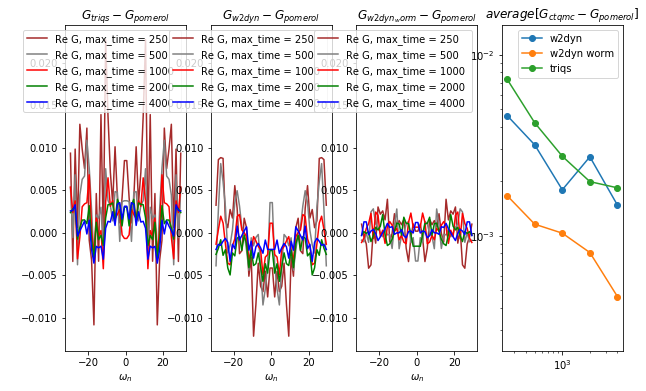

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 0


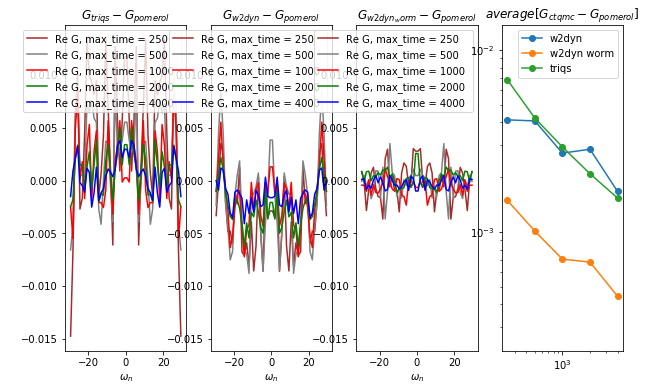

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 1


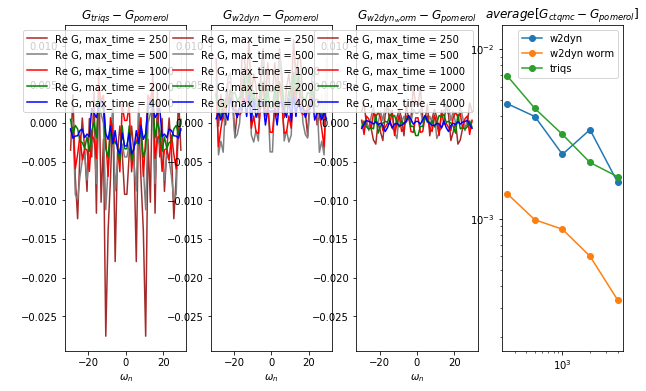

In [5]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oploti, oplotr, plt
import numpy as np
plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (10,6)

pom = HDFArchive('results/pomerol.h5','r')

color=['brown', 'grey', 'red', 'green', 'blue', 'black']
#titlecolor=['grey', 'red', 'green', 'black']

plt.rcParams.update({'font.size': 10})

#for m in {"I", "R"}:
    #for s in {"up", "dn"}:
        #for b1 in range(0,2):
for m in {"I", "R"}:
   for s in {"up", "dn"}:
       for b1 in range(0,2):
           for b2 in range(0,2):

                data = []

                w2dyn_vars = []
                w2dyn_w_vars = []
                triqs_vars = []
                w2dyn_diffs = []
                w2dyn_w_diffs = []
                triqs_diffs = []

                times = [250, 500, 1000, 2000, 4000]
                #times = [250, 500, 1000]

                for nt, max_time in enumerate(times):

                    folder = "results_"+str(max_time)+"/"
                    print 'folder', folder

                    w2dyn = HDFArchive(folder+'w2dyn_cthyb_mrandom.h5','r')
                    w2dyn_w = HDFArchive(folder+'w2dyn_cthyb_worm.h5','r')
                    triqs = HDFArchive(folder+'cthyb.h5','r')

                    beta = w2dyn["G/dn/mesh/domain/beta"]
                    #print "beta", beta
                    iw = triqs["Solver_Info/solver/G0_iw/up/mesh"]

                    iw_max = 30

                    iw_ = []
                    ind_min = 10000
                    ind_max = 0
                    for n,i in enumerate(iw):
                        #print 'i', np.imag(i.value)
                        #print 'n,i', n,i
                        iw_ = np.append(iw_, np.imag(i.value))

                        if np.imag(i.value) < -iw_max:
                            ind_min = n
                    ind_max = iw_.shape[0] - ind_min - 1

                    #print 'iw_', iw_
                    #print 'ind_min', ind_min
                    #print 'ind_max', ind_max
                    #print 'iw_[ind_min]', iw_[ind_min]
                    #print 'iw_[ind_max]', iw_[ind_max]

                    def real_or_imag(array):

                        if m == "R":
                            return np.real(array)
                        else:
                            return np.imag(array)


                    max_triqs = np.amax(real_or_imag(triqs['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))
                    max_w2dyn = np.amax(real_or_imag(w2dyn['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))

                    min_triqs = np.amin(real_or_imag(triqs['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))
                    min_w2dyn = np.amin(real_or_imag(w2dyn['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))

                    ymin = min(min_triqs, min_w2dyn)
                    ymax = max(max_triqs, max_w2dyn)

                    ### calculate variance

                    w2dyn_var = np.var(real_or_imag(w2dyn['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))
                    w2dyn_w_var = np.var(real_or_imag(w2dyn_w['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))
                    triqs_var = np.var(real_or_imag(triqs['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max]))
                    w2dyn_diff = np.average(np.abs(real_or_imag(w2dyn['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max])))
                    w2dyn_w_diff = np.average(np.abs(real_or_imag(w2dyn_w['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max])))
                    triqs_diff = np.average(np.abs(real_or_imag(triqs['G'][s][b1,b2].data[ind_min:ind_max]-pom['G'][s][b1,b2].data[ind_min:ind_max])))

                    #print 'w2dyn_diff', w2dyn_diff
                    #exit()

                    #print 'w2dyn_var', w2dyn_var
                    #print 'triqs_var', triqs_var

                    w2dyn_vars = np.append(w2dyn_vars, w2dyn_var)
                    w2dyn_w_vars = np.append(w2dyn_w_vars, w2dyn_w_var)
                    triqs_vars = np.append(triqs_vars, triqs_var)
                    w2dyn_diffs = np.append(w2dyn_diffs, w2dyn_diff)
                    w2dyn_w_diffs = np.append(w2dyn_w_diffs, w2dyn_w_diff)
                    triqs_diffs = np.append(triqs_diffs, triqs_diff)
                    #exit()

                    ### plot plot plot the stuff

                    label = "G, max_time = " + str(max_time)
                    plt.subplot(1, 4, 1)
                    plt.title("$G_{triqs}-G_{pomerol}$")
                    oplot(triqs['G'][s][b1,b2]-pom['G'][s][b1,b2], '-', x_window = (-iw_max,iw_max), mode = m, name = label , color = color[nt])
                    plt.plot(ymax,ymax, color="white")
                    plt.plot(ymin,ymin, color="white")
                    plt.ylabel(" ")

                    plt.subplot(1, 4, 2)
                    plt.title("$G_{w2dyn}-G_{pomerol}$")
                    oplot(w2dyn['G'][s][b1,b2]-pom['G'][s][b1,b2], '-', x_window = (-iw_max,iw_max), mode = m, name = label, color = color[nt])
                    plt.plot(ymax,ymax, color="white")
                    plt.plot(ymin,ymin, color="white")
                    plt.ylabel(" ")

                    plt.subplot(1, 4, 3)
                    plt.title("$G_{w2dyn_worm}-G_{pomerol}$")
                    oplot(w2dyn_w['G'][s][b1,b2]-pom['G'][s][b1,b2], '-', x_window = (-iw_max,iw_max), mode = m, name = label, color = color[nt])
                    plt.plot(ymax,ymax, color="white")
                    plt.plot(ymin,ymin, color="white")
                    plt.ylabel(" ")

                print "spin = " + str(s) + ", orb_1 = " + str(b1) + ", orb_2 = " + str(b2)

                def get_log_boundaries(arr1, arr2):

                    maxval = max(np.amax(arr1), np.amax(arr2))
                    minval = min(np.amin(arr1), np.amin(arr2))

                    expon = np.floor(np.log10(np.abs(maxval))).astype(int)
                    upperbound = 10.0**(expon+1)

                    expon = np.floor(np.log10(np.abs(minval))).astype(int)
                    lowerbound = 10.0**(expon)

                    #return (lowerbound, upperbound)
                    return (minval/2, maxval*2)

                ax3 = plt.subplot(1, 4, 4)
                plt.loglog(times, w2dyn_diffs, "o-", label = "w2dyn")
                plt.loglog(times, w2dyn_w_diffs, "o-", label = "w2dyn worm")
                plt.loglog(times, triqs_diffs, "o-", label = "triqs")

                plt.ylim(get_log_boundaries(w2dyn_w_diffs, triqs_diffs))

                plt.title("$average[G_{ctqmc}-G_{pomerol}]$")
                plt.ylabel(" ")

                plt.legend(loc = 'best')


                plt.show()